# Machine Learning Prerequite Test

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time

# Question 01
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Here we have nxk and kxm matrices to multiply. Considering row by column multiplication, 
for first element of resultant matrix, using first row of first matrix(k elemnts) and first column of 2nd matrix (k elements) k multiplications and k-1 additions will be performed. 

But there will be n*m elements in the resultant matrix(nxm matrix), so 

Total no. of multiplications  = n*m*k

Total no. of additions =  n*m*(k-1)

# Question 02
**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [66]:
# Using Nested lists
start = time.time()

def matrix_multiplication(m1,m2):   
    
    n = len(m1)
    m= len(m2[0])
    k1 = len(m1[0])
    result = [[0 for i in range(m)] for i in range(n)] #Initialising matrix using list comprehension   
    
    for i in range(n):
        for j in range(m):
            for k in range(k1):
                result[i][j] += (m1[i][k] * m2[k][j])
    return result


# m1 = [[2,3,5],[4,3,2]]
# m2 = [[2,3],[4,5],[6,7]]
m1 = np.random.randint(100, size=(20, 80))
m2 = np.random.randint(1000, size=(80, 20))
print(matrix_multiplication(m1,m2))
end = time.time()
print('Time taken:',end - start)


[[1892810, 1796970, 2129582, 2071141, 1901041, 2208640, 1867498, 2000129, 1787104, 1940100, 1697656, 1962750, 2021231, 2024370, 1883496, 1933331, 1841179, 1870815, 2034121, 2061067], [1876388, 1830702, 2227539, 2151038, 1967419, 2268302, 1897972, 1853213, 1902081, 2068587, 1891208, 2139019, 2085122, 2088256, 2033301, 1820931, 1770671, 1967123, 2043306, 1996932], [1928790, 1790327, 2336874, 2111175, 2187319, 2301555, 1947079, 1984527, 2098814, 2193624, 1964757, 2053561, 2199791, 2073514, 2044855, 1917945, 1924302, 1997063, 2022100, 1976003], [1787776, 1708452, 2105553, 2152002, 2038146, 2127866, 1798053, 1726757, 1901314, 1860997, 1837975, 1962921, 2132612, 1979156, 1684123, 1738153, 1803573, 1783092, 1922570, 1858139], [1987038, 1856861, 2234085, 2242871, 2041670, 2357240, 1953441, 1987040, 1956984, 2315942, 1989241, 2255614, 2343540, 2105728, 2043253, 1967910, 1976666, 1925595, 2188834, 2132073], [1954476, 1834183, 2295370, 2264947, 2113553, 2404040, 2096393, 2234846, 2172427, 2446736

In [67]:
# Using Numpy array
start = time.time()
def matrix_multiplication(m1,m2):   
    
    n = len(m1)
    m= len(m2[0])
    result = np.zeros((n,m), dtype = int) #Initialisation  
    m2 = m2.T
    for i in range(n):
        for j in range(m):
            result[i][j] = np.sum(m1[i]*m2[j])
    return result


# m1 = np.array([[2,3,5],[4,3,2]])
# m2 = np.array([[2,3],[4,5],[6,7]])

m1 = np.random.randint(100, size=(20, 80))
m2 = np.random.randint(1000, size=(80, 20))

print(matrix_multiplication(m1,m2))
end = time.time()
print('Time taken:',end - start)

[[2312941 2380624 2050399 2287380 2212428 2041487 2264300 2347768 2187003
  2055895 2355615 2410408 2544115 2128201 2056862 2223657 2159514 2040112
  2338612 2195473]
 [1896566 1948695 1592610 1797209 1679613 1800720 1987556 1905969 2020686
  1698636 1973788 1988088 2095456 1839196 1778714 1774029 1797094 1729651
  1824815 1981367]
 [2073525 2320981 1835429 2177197 1981994 1891591 2046685 2073513 1894695
  2053648 2340919 2297559 2246738 1953482 1843402 2076398 1803006 1958597
  2170958 2101324]
 [2224307 2383399 2044226 2241769 2123826 1946198 2242031 2224677 2136335
  2164497 2250093 2409919 2489671 1959022 1941633 2151640 2098957 2082772
  2036699 2108651]
 [1708751 1890343 1394724 1604642 1510647 1487658 1764034 1819654 1736268
  1677852 1702089 1801788 1867243 1504317 1494922 1588036 1528456 1637862
  1595030 1757864]
 [2169632 2328592 1809813 2012039 2036803 1840925 2184956 2127577 2155729
  2025936 2312786 2301351 2221381 2093067 2066688 2178538 1872967 2177299
  2260701 2096940

# Question 03
**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [68]:
#Finding highest element in one pass

def find_highest_element(arr):
    max_val = -1000000
    for i in arr:
        if i>max_val:
            max_val = i
    return max_val

arr = np.array([1,2,43,56,576,68,8,6,5334,4,3212,4,455,6,78,-435,5,-67,5])
find_highest_element(arr)


5334

In [69]:
# Finding the second highest element using 2 pass
def find_second_highest(arr):
    n = len(arr);
    max_val = -1000000   
    idx = -1
    for i in range (0,n):
        if arr[i] > max_val:
            max_val = arr[i]
            idx = i
    
    max_val = -1000000  
    for i in range(0, n):
        if (arr[i] > max_val) and (i != idx) :
            max_val = arr[i]
    
    return max_val


arr = np.array([1,2,43,56,576,68,8,6,53,4,3212,4,455,6,78,-435,5,-67,5])
find_second_highest(arr)    

576

Time complexity of finding median of array using above approach will be
 $$ O(n^2)$$
 
 We can first sort the array and then use the mathematical formula for finding median

In [70]:
start = time.time()

def find_median(arr):    
    n = len(arr)
    if n%2==1:
        for j in range((n//2)+1):
            max_val = -1000000
            for i in arr:
                if i>max_val:
                    max_val = i
            
            arr = np.delete(arr, np.argwhere(arr==max_val))#Deletion by value
    else:
        for j in range((n//2)+1):
            max_val = -1000000
            for i in arr:
                if i>max_val:
                    max_val = i
            if j==(n/2)-1:
                max_val1 = max_val
            arr = np.delete(arr, np.argwhere(arr==max_val))#Deletion by value
    
    return (max_val1 + max_val)/2

# arr = np.array([2,43,56,576,68,8,6,5334,4,3212,4,455,6,78,-435,5,-67,5])
# arr = np.arange(1,7)
arr = np.random.random(10000)
userdefined_median = find_median(arr)

end = time.time()

print('My function result',userdefined_median, end = " ")
print('Time taken:', end-start,'seconds')

# Suggested method:- first sort the array and then find the middle element.
start = time.time()
def find_median_suggested_method(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    
    if n % 2 == 1:
        # For odd-length array, return the middle element
        return sorted_arr[n // 2]
    else:
        # For even-length array, return the average of the two middle elements
        middle_left = sorted_arr[(n // 2) - 1]
        middle_right = sorted_arr[n // 2]
        return (middle_left + middle_right) / 2


# Example usage:
arr = [2, 43, 56, 576, 68, 8, 6, 5334, 4, 3212, 4, 455, 6, 78, -435, 5, -67, 5]
user_defined_median = find_median(arr)
print("User-defined Median:", user_defined_median)


#Using Builtin np.median function
start = time.time()
builtin_median = np.median(arr)
end = time.time()

#Using the sort command
start = time.time()
#SORT SE KARNA HAI
end = time.time()

print('Builtin Function result',builtin_median, end = ' ')
print('Time taken:', end-start,'seconds')

My function result 0.5052943229273619 Time taken: 2.4748096466064453 seconds
User-defined Median: 25.5
Builtin Function result 7.0 Time taken: 0.0 seconds


# Question 04
What is the gradient of the following function with respect to x and y?
$$ {f(x,y) = x^2y+y^3\sin(x)} $$

Gradient of the given function is given by

$$ {(2xy+y^3\cos(x))\vec{a_x}}+{(x^2+3y^2\sin (x))\vec{a_y}} $$

# Question 05
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [71]:
#This program throws error saying no module named jax is found
import jax.numpy as jnp
from jax import *

def f(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)


x = jnp.array([0,1,2])
y = jnp.array([0,1,1])
gradient = jax.grad(f)
print(gradient(x,y))


TypeError: grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.

# Question 06
**Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as sy
from sympy import *
x,y,i,j = sy.symbols('x y i j')

f = (x**2)*y + (y**3)*sin(x)

f_dash_x = sy.diff(f, x)#wrt x
f_dash_y = sy.diff(f, y)#wrt y

gradient = f_dash_x*i +f_dash_y*j #gradient representation
print(gradient)

#Reference:
#https://medium.com/@ilmunabid/how-to-find-a-gradient-slope-of-a-function-in-python-774f865467d2

i*(2*x*y + y**3*cos(x)) + j*(x**2 + 3*y**2*sin(x))


# Question 07
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

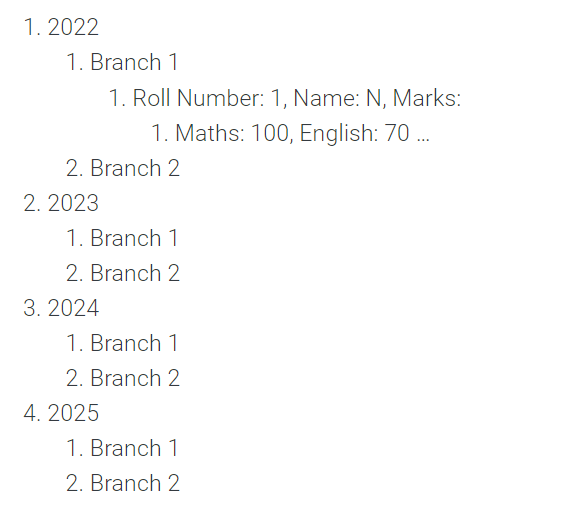

In [ ]:
dic = {2022:{'Branch 1':{'Roll Number':1,'Name':'RK1','Marks':{'Maths':90,'English':70}},
          'Branch 2':{'Roll Number':2,'Name':'RK2','Marks':{'Maths':98,'English':79}}},
       2023:{'Branch 1':{},'Branch 2':{}},
       
       2024:{'Branch 1':{},'Branch 2':{}},
       2025:{'Branch 1':{},'Branch 2':{}}
      }
dic

{2022: {'Branch 1': {'Roll Number': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

# Question 08
**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self):
        self.students = {}

class Year:
    def __init__(self):
        self.branches = {}

class Database:
    def __init__(self):
        self.years = {}

    def add_student(self, year, branch, roll_number, name, marks):
        if year not in self.years:
            self.years[year] = Year()

        if branch not in self.years[year].branches:
            self.years[year].branches[branch] = Branch()

        self.years[year].branches[branch].students[roll_number] = Student(roll_number, name, marks)

# Example Usage:
database = Database()

# Adding students to the database
database.add_student(2022, 'Branch 1', 1, 'Rahul1', {'Maths': 90, 'English': 70})
database.add_student(2022, 'Branch 2', 2, 'Rahul2', {'Maths': 98, 'English': 79})

# Accessing information
for year, year_obj in database.years.items():
    print(f"Year: {year}")
    for branch, branch_obj in year_obj.branches.items():
        print(f"  Branch: {branch}")
        for roll_number, student_obj in branch_obj.students.items():
            print(f"    Student: Roll Number: {student_obj.roll_number}, Name: {student_obj.name}, Marks: {student_obj.marks}")


Year: 2022
  Branch: Branch 1
    Student: Roll Number: 1, Name: Rahul1, Marks: {'Maths': 90, 'English': 70}
  Branch: Branch 2
    Student: Roll Number: 2, Name: Rahul2, Marks: {'Maths': 98, 'English': 79}


# Question 09
**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

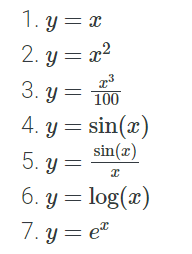

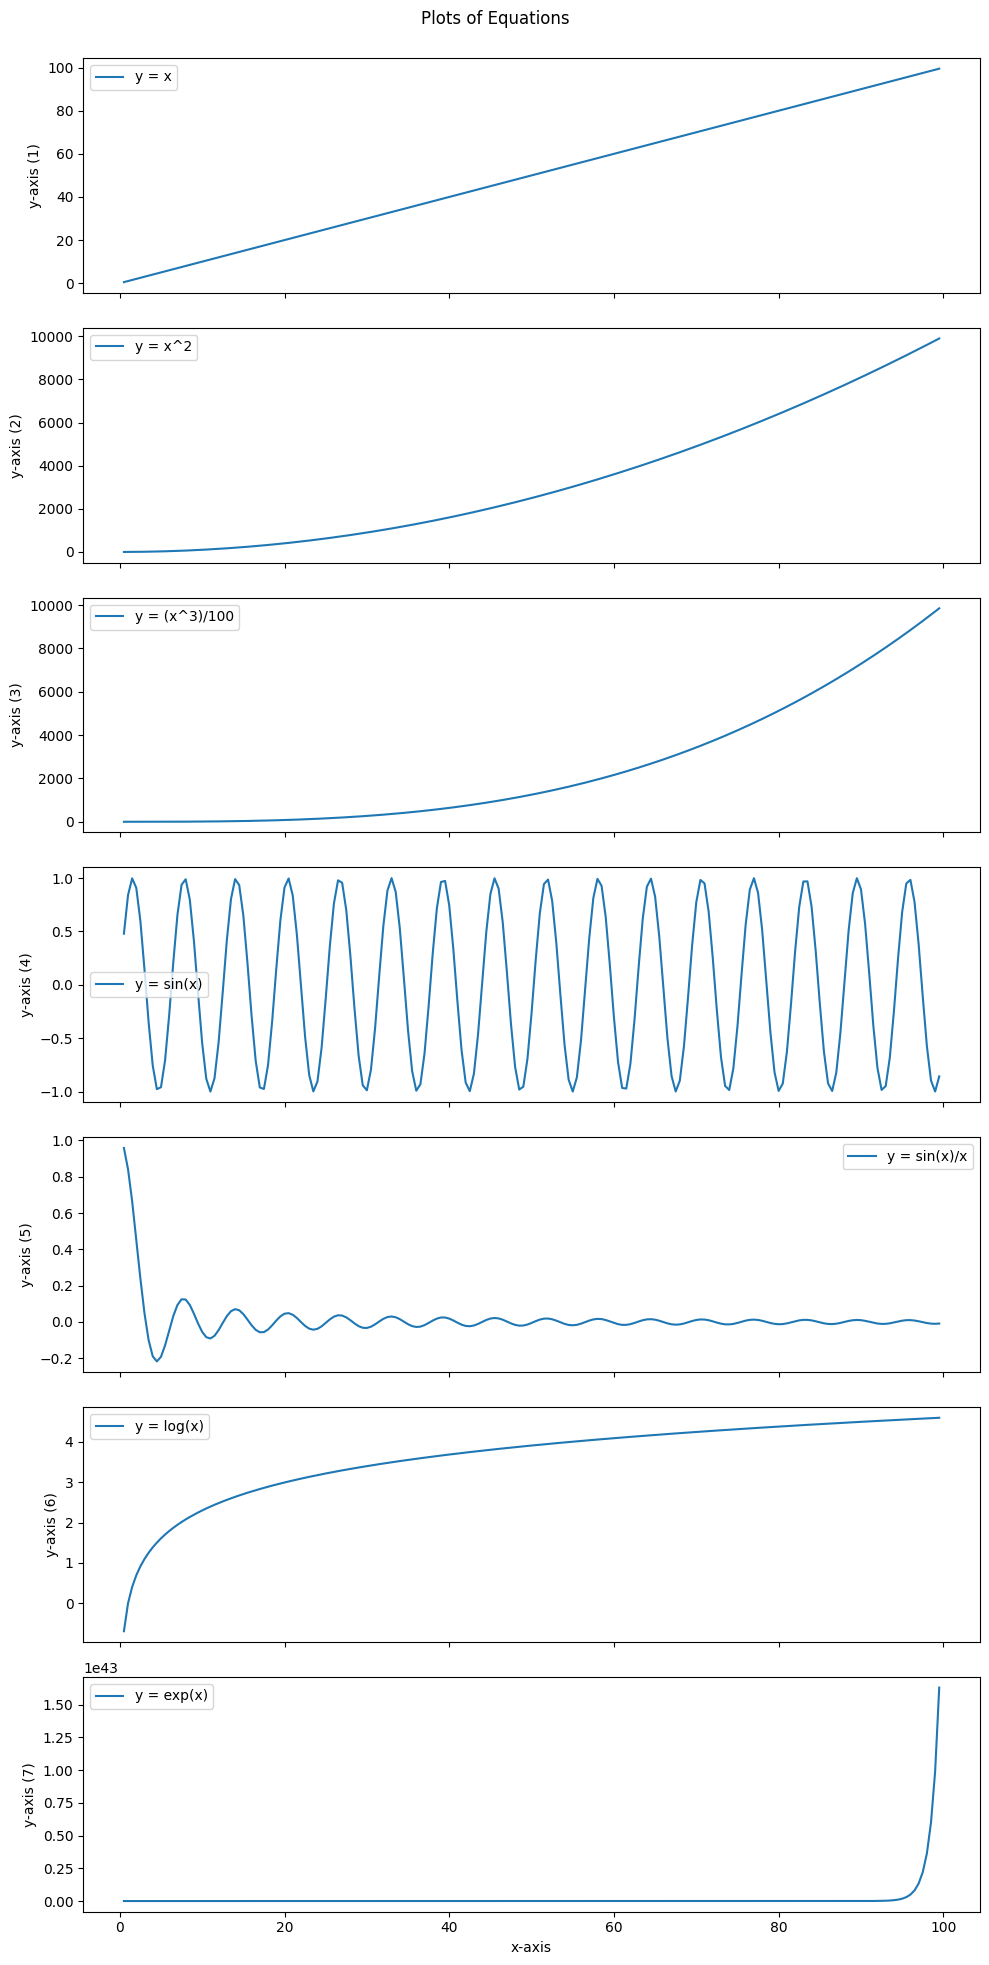

In [99]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

# Create subplots for each equation
fig, axs = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

# Plot each equation on a separate subplot
axs[0].plot(x, y1, label='y = x')
axs[1].plot(x, y2, label='y = x^2')
axs[2].plot(x, y3, label='y = (x^3)/100')
axs[3].plot(x, y4, label='y = sin(x)')
axs[4].plot(x, y5, label='y = sin(x)/x')
axs[5].plot(x, y6, label='y = log(x)')
axs[6].plot(x, y7, label='y = exp(x)')

# Add labels and title to each subplot
for i, ax in enumerate(axs):
    ax.set_ylabel(f'y-axis ({i+1})')
    ax.legend()

# Add shared x-axis label and title
axs[-1].set_xlabel('x-axis')
fig.suptitle('Plots of Equations')

# Adjust layout to prevent clipping of labels
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()


# Question 10
**Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [103]:
# Generate a 20x5 matrix with random numbers in the range [1, 2)
random_matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame with the generated matrix and column names
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

df.head()

,a,b,c,d,e
0,1.065419,1.507154,1.623629,1.519629,1.989439
1,1.579337,1.017172,1.235892,1.759711,1.327753
2,1.864576,1.061509,1.440224,1.342789,1.471535
3,1.687707,1.257090,1.301102,1.050054,1.482178
4,1.615043,1.620592,1.517456,1.970741,1.453470


In [105]:
# Find the column with the highest standard deviation
highest_std_column = df.std().idxmax()

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

print("\nColumn with the highest standard deviation:", highest_std_column)
print("Row with the lowest mean:", lowest_mean_row)


Column with the highest standard deviation: b
Row with the lowest mean: 12


# Question 11
**Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [112]:

# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
# Create a new column "g" based on the condition in column "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Print the DataFrame and results
print("DataFrame:")
df.head()


DataFrame:


,a,b,c,d,e,f,g
0,1.065419,1.507154,1.623629,1.519629,1.989439,7.705270,LT8
1,1.579337,1.017172,1.235892,1.759711,1.327753,6.919866,LT8
2,1.864576,1.061509,1.440224,1.342789,1.471535,7.180634,LT8
3,1.687707,1.257090,1.301102,1.050054,1.482178,6.778132,LT8
4,1.615043,1.620592,1.517456,1.970741,1.453470,8.177303,GT8


In [113]:
# Find the number of rows where the value in column "g" is "LT8"
num_lt8_rows = len(df[df['g'] == 'LT8'])
# Find the standard deviation of column "f" for "LT8" and "GT8" rows
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of column 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of column 'f' for 'GT8' rows:", std_gt8)


Number of rows where the value in column 'g' is 'LT8': 16
Standard deviation of column 'f' for 'LT8' rows: 0.45898840399216967
Standard deviation of column 'f' for 'GT8' rows: 0.33042150123203207


# Question 12
**Write a small piece of code to explain broadcasting in numpy.**

Broadcasting in NumPy is a powerful feature that allows operations on arrays of different shapes and sizes.

Here's a simple example to illustrate broadcasting:

In [120]:
# NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
c = a*b
print(c)

# Broadcasting: NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
c = a * b
print(c)


[2. 4. 6.]
[2. 4. 6.]


# Question 13
**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [121]:
arr = np.array([[3, 7, 2], [8, 5, 1], [6, 4, 9]])
arr

array([[3, 7, 2],
       [8, 5, 1],
       [6, 4, 9]])

In [128]:
def custom_argmin(arr):
  min_val = 1e7
  idx = -1
  n = len(arr)
  for i in range(0, n):
    if arr[i] < min_val:
      min_val = arr[i]
      idx = i

  return idx

arr = np.array([1,2,43,56,576,68,8,6,53,4,3212,4,455,6,78,-435,5,-67,5])
# arr = np.random.rand(1000)

# Using the custom_argmin function
custom_argmin_index = custom_argmin(arr)
print("Custom argmin index:", custom_argmin_index)

# Using np.argmin for verification
numpy_argmin_index = np.argmin(arr, axis=None)
print("NumPy argmin index:", numpy_argmin_index)


Custom argmin index: 15
NumPy argmin index: 15


## <----------------------- The End !!  -------------------------->